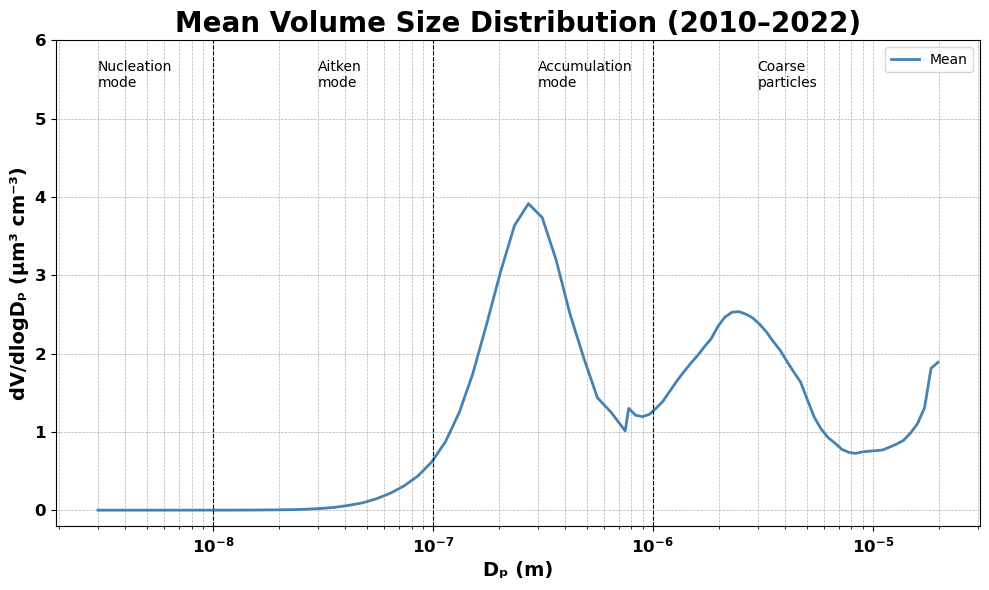

In [1]:
# GOOD ONE


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
df = pd.read_excel(file_path)

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract particle diameter columns and convert to float
diameter_cols = df.columns[1:]  # Exclude datetime only
diameters_m = np.array([float(col) for col in diameter_cols])       # in meters
diameters_um = diameters_m * 1e6                                     # convert to micrometers

# Calculate volume factors in µm³: (π/6) * Dp^3
volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

# Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
volume_df = df[diameter_cols] * volume_factors  # units: µm³/cm³

# Calculate mean volume distribution across the entire dataset
mean_distribution = volume_df.mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(diameters_m, mean_distribution, color='steelblue', linewidth=2, label='Mean')

# Axis settings
plt.xscale('log')
plt.ylim(-0.2, 6)
plt.xlabel('Dₚ (m)', fontsize=14, fontweight='bold')
plt.ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=14, fontweight='bold')
plt.title('Mean Volume Size Distribution (2010–2022)', fontsize=20, fontweight='bold')

# Add vertical lines for particle mode regions
plt.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

# Annotate modes
plt.text(3e-9, 5.4, 'Nucleation\nmode', fontsize=10)
plt.text(3e-8, 5.4, 'Aitken\nmode', fontsize=10)
plt.text(3e-7, 5.4, 'Accumulation\nmode', fontsize=10)
plt.text(3e-6, 5.4, 'Coarse\nparticles', fontsize=10)

# Finalize
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Make axis tick values bold
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

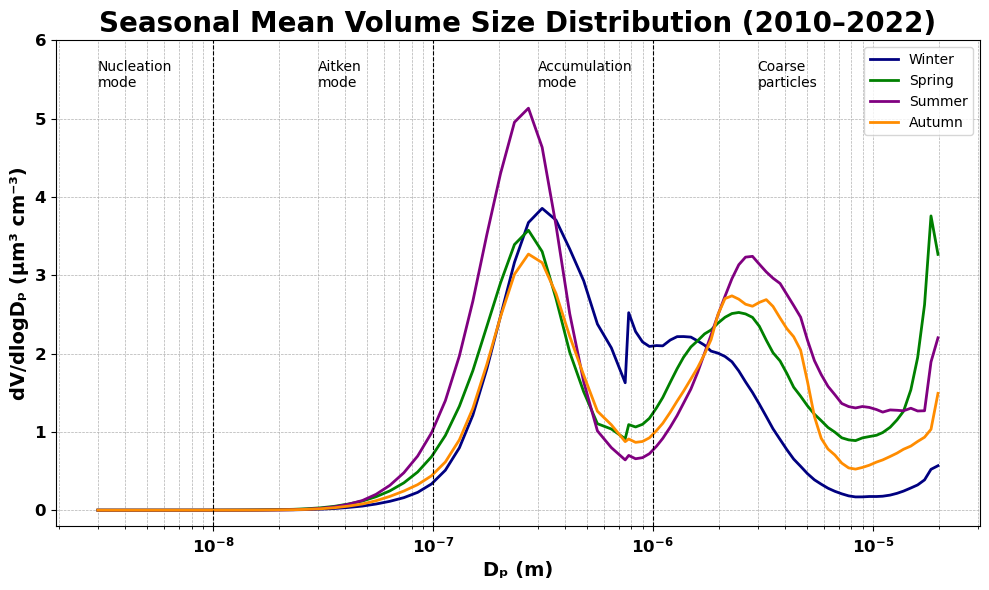

In [2]:
# GOOD ONE


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
df = pd.read_excel(file_path)

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Assign seasons
def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Spring'
    elif month in [6, 7, 8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['datetime'].dt.month.apply(get_season)

# Extract particle diameter columns and convert to float
diameter_cols = df.columns[1:-1]  # Exclude datetime and Season
diameters_m = np.array([float(col) for col in diameter_cols])       # in meters
diameters_um = diameters_m * 1e6                                     # convert to micrometers

# Calculate volume factors in µm³: (π/6) * Dp^3
volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

# Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
volume_df = df[diameter_cols] * volume_factors  # units: µm³/cm³
volume_df['Season'] = df['Season']

# Calculate seasonal means
seasonal_means = volume_df.groupby('Season').mean()

# Plotting
plt.figure(figsize=(10, 6))
colors = {'Winter': 'navy', 'Spring': 'green', 'Summer': 'purple', 'Autumn': 'darkorange'}

for season in ['Winter', 'Spring', 'Summer', 'Autumn']:
    plt.plot(diameters_m, seasonal_means.loc[season], label=season, color=colors[season], linewidth=2)

# Axis settings
plt.xscale('log')
plt.ylim(-0.2, 6)
plt.xlabel('Dₚ (m)', fontsize=14, fontweight='bold')
plt.ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=14, fontweight='bold')
plt.title('Seasonal Mean Volume Size Distribution (2010–2022)', fontsize=20, fontweight='bold')

# Add vertical lines for particle mode regions
plt.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

# Annotate modes
plt.text(3e-9, 5.4, 'Nucleation\nmode', fontsize=10)
plt.text(3e-8, 5.4, 'Aitken\nmode', fontsize=10)
plt.text(3e-7, 5.4, 'Accumulation\nmode', fontsize=10)
plt.text(3e-6, 5.4, 'Coarse\nparticles', fontsize=10)

# Finalize
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Make axis tick values bold
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()

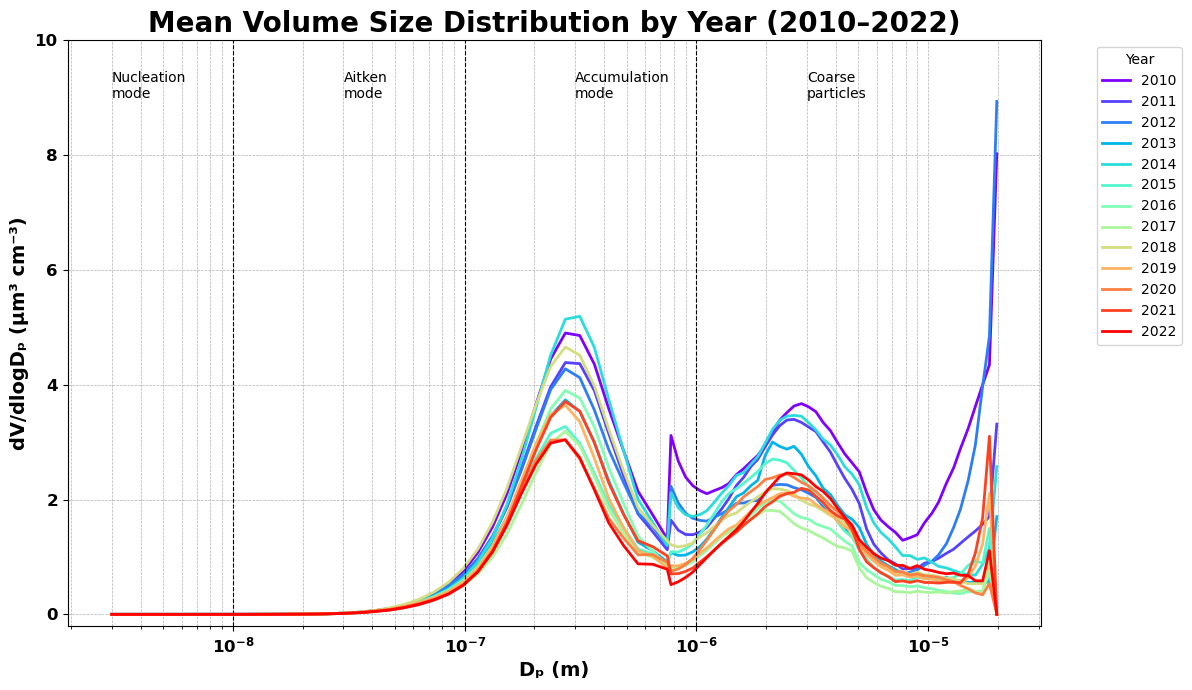

In [6]:
# GOOD ONE


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/Users/touqeergill/Desktop/10. DMPS + APS Hourly Avg (2010-2022).xlsx'
df = pd.read_excel(file_path)

# Convert 'datetime' column to datetime format and extract year
df['datetime'] = pd.to_datetime(df['datetime'])
df['Year'] = df['datetime'].dt.year

# Extract particle diameter columns and convert to float
diameter_cols = df.columns[1:-1]  # Exclude datetime and Year
diameters_m = np.array([float(col) for col in diameter_cols])       # in meters
diameters_um = diameters_m * 1e6                                     # convert to micrometers

# Calculate volume factors in µm³: (π/6) * Dp^3
volume_factors = (np.pi / 6) * diameters_um**3  # units: µm³

# Convert number distribution (particles/cm³) to volume distribution (µm³/cm³)
volume_df = df[diameter_cols] * volume_factors
volume_df['Year'] = df['Year']

# Group by year and compute mean volume size distribution
yearly_means = volume_df.groupby('Year').mean()

# Plotting
plt.figure(figsize=(12, 7))
colors = plt.cm.rainbow(np.linspace(0, 1, len(yearly_means)))  # Rainbow colors

for i, year in enumerate(yearly_means.index):
    plt.plot(diameters_m, yearly_means.loc[year], label=str(year), color=colors[i], linewidth=2)

# Axis settings
plt.xscale('log')
plt.ylim(-0.2, 10)
plt.xlabel('Dₚ (m)', fontsize=14, fontweight='bold')
plt.ylabel('dV/dlogDₚ (µm³ cm⁻³)', fontsize=14, fontweight='bold')
plt.title('Mean Volume Size Distribution by Year (2010–2022)', fontsize=20, fontweight='bold')

# Add vertical lines for particle mode regions
plt.axvline(1e-8, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-7, color='k', linestyle='--', linewidth=0.8)
plt.axvline(1e-6, color='k', linestyle='--', linewidth=0.8)

# Annotate modes
plt.text(3e-9, 9, 'Nucleation\nmode', fontsize=10)
plt.text(3e-8, 9, 'Aitken\nmode', fontsize=10)
plt.text(3e-7, 9, 'Accumulation\nmode', fontsize=10)
plt.text(3e-6, 9, 'Coarse\nparticles', fontsize=10)

# Move legend outside the plot
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Grid and ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tick_params(axis='both', which='major', labelsize=12, labelcolor='black')
for label in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()